# Exploratory Data Analysis: Celeba Dataset
---

## Import libraries

In [1]:
import subprocess
from pathlib import Path

from torch.utils.data import Dataset, DataLoader
from skimage.io import imread
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Download data

In [2]:
KAGGLE_FILE = "jessicali9530/celeba-dataset"
data_path = Path("data/celeba")
data_path.mkdir(parents=True, exist_ok=True)

In [4]:
subprocess.check_call(["kaggle", "datasets", "download", KAGGLE_FILE, "--path", data_path, "--unzip"])

0

## Load data

In [5]:
def show_image(img_id: str, title: str = None, data_path: Path = Path("data/celeba")):
    img_path = data_path / "img_align_celeba" / "img_align_celeba" / img_id
    img = imread(img_path)
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([]) 
    ax.set_title(title)

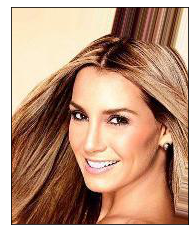

In [6]:
show_image("000001.jpg")

In [7]:
df_attr = pd.read_csv(data_path / "list_attr_celeba.csv", index_col='image_id')
df_attr.replace(to_replace=-1, value=0, inplace=True)
df_attr.shape

(202599, 40)

In [8]:
df_attr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202599 entries, 000001.jpg to 202599.jpg
Data columns (total 40 columns):
5_o_Clock_Shadow       202599 non-null int64
Arched_Eyebrows        202599 non-null int64
Attractive             202599 non-null int64
Bags_Under_Eyes        202599 non-null int64
Bald                   202599 non-null int64
Bangs                  202599 non-null int64
Big_Lips               202599 non-null int64
Big_Nose               202599 non-null int64
Black_Hair             202599 non-null int64
Blond_Hair             202599 non-null int64
Blurry                 202599 non-null int64
Brown_Hair             202599 non-null int64
Bushy_Eyebrows         202599 non-null int64
Chubby                 202599 non-null int64
Double_Chin            202599 non-null int64
Eyeglasses             202599 non-null int64
Goatee                 202599 non-null int64
Gray_Hair              202599 non-null int64
Heavy_Makeup           202599 non-null int64
High_Cheekbones        202

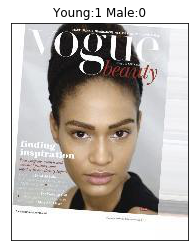

In [9]:
img_id = "000600.jpg"
y1 = df_attr.loc[img_id, 'Male']
y2 = df_attr.loc[img_id, 'Young']
title = f"Young:{y2} Male:{y1}"
show_image(img_id, title)

# Data Distribution

## Male Faces

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef8b780b50>]],
      dtype=object)

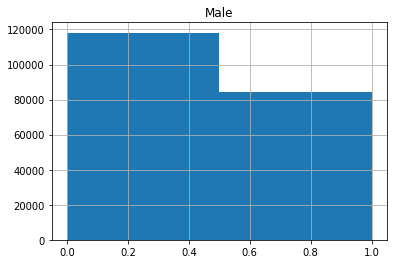

In [10]:
df_attr.hist(column='Male', bins=2)

In [11]:
num_female = df_attr['Male'].value_counts()[0]
num_male = df_attr['Male'].value_counts()[1]
print(f"Male: {num_male / (num_male+num_female) * 100:.3f}%")

Male: 41.675%


## Possible Targets: Young, Attractive

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef8b724990>,
      dtype=object)

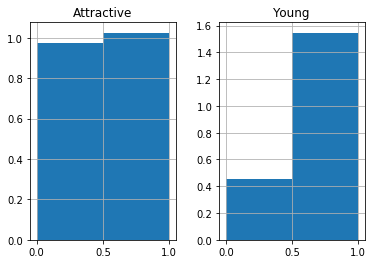

In [12]:
df_attr.hist(column=['Young', 'Attractive'], bins=2, density=True)

# Attribute Correlation

In [13]:
attr_correlations = df_attr.corr(method='pearson')

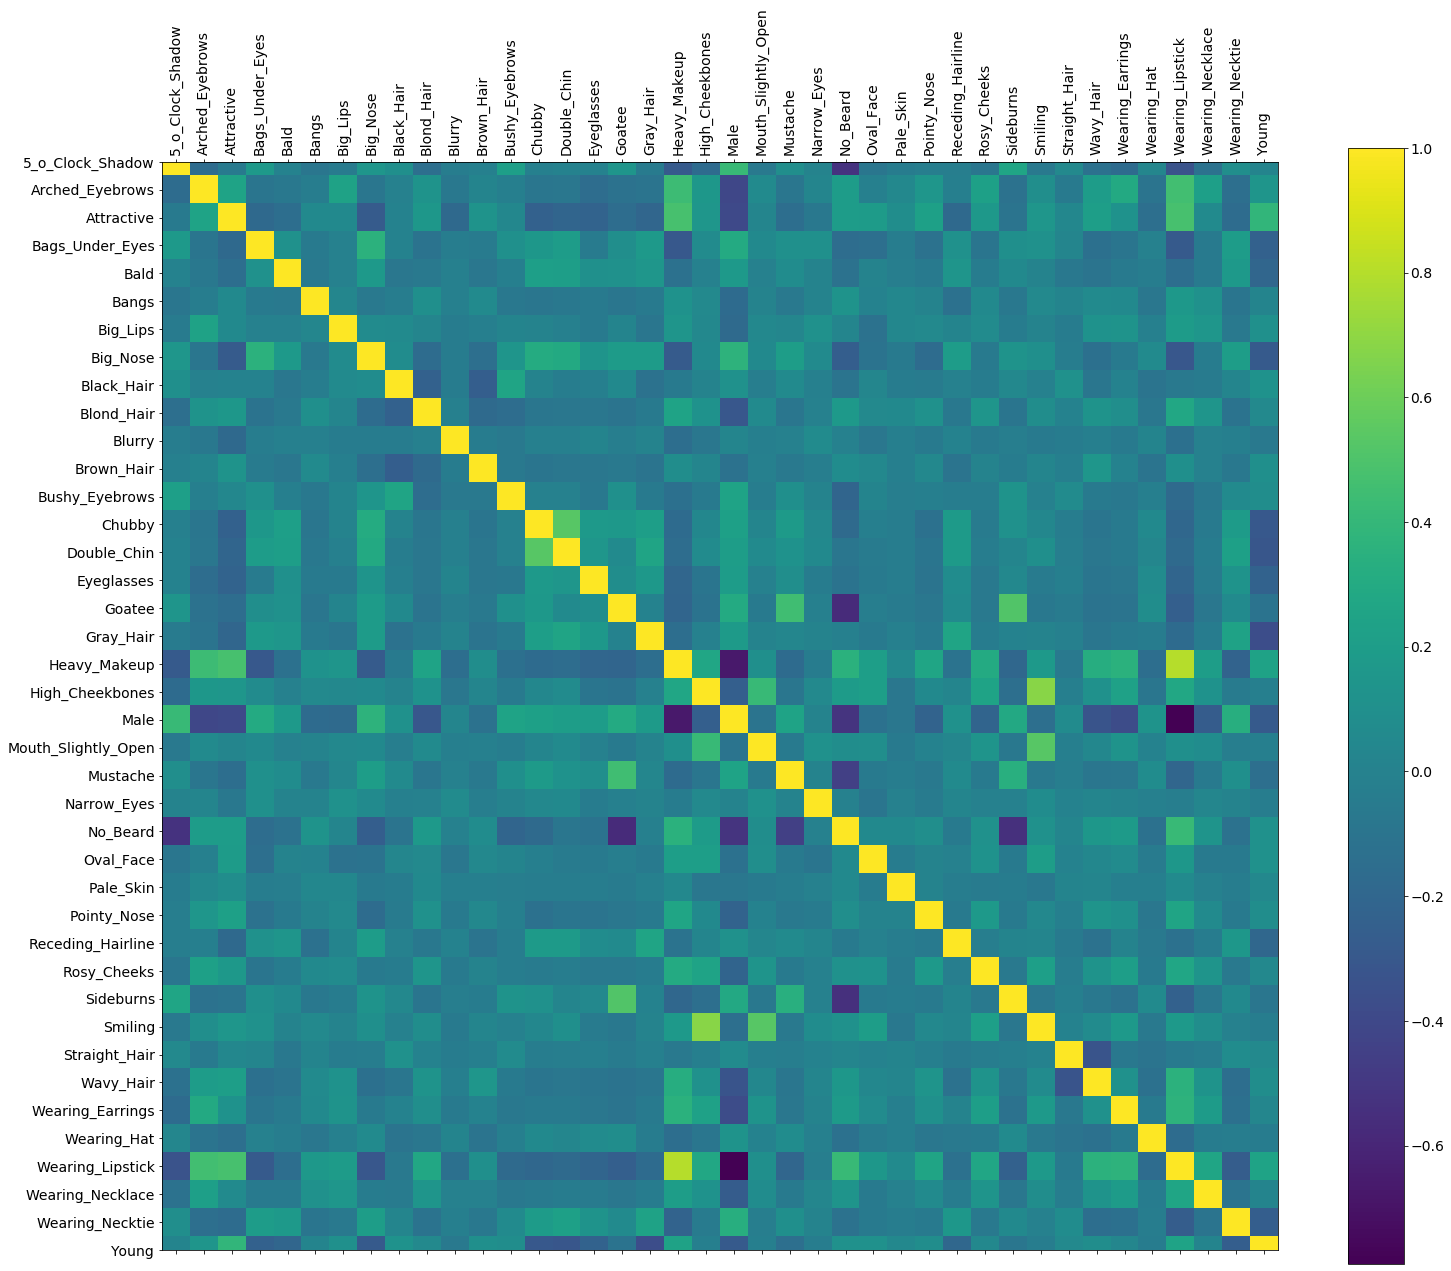

In [14]:
fig = plt.figure(figsize=(25, 20))
plt.matshow(attr_correlations, fignum=fig.number)
plt.xticks(range(df_attr.shape[1]), df_attr.columns, fontsize=14, rotation=90)
plt.yticks(range(df_attr.shape[1]), df_attr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

## What facial attributes correlate with Attractiveness?

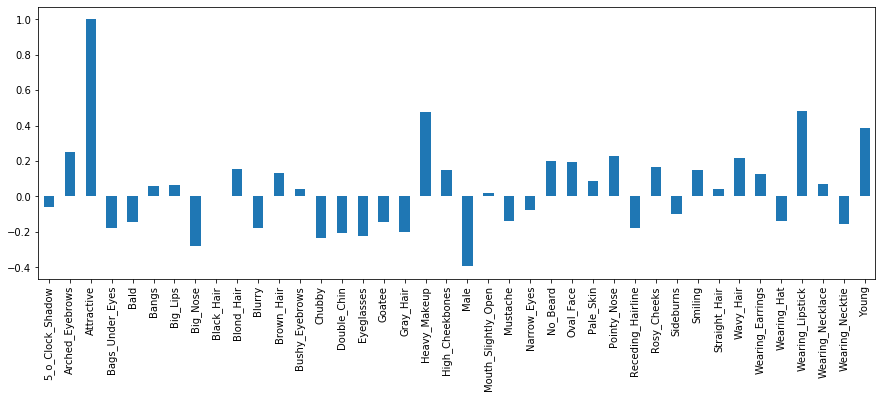

In [15]:
attr_correlations['Attractive'].plot.bar(figsize=(15,5))

## What facial attributes correlate with Gender?

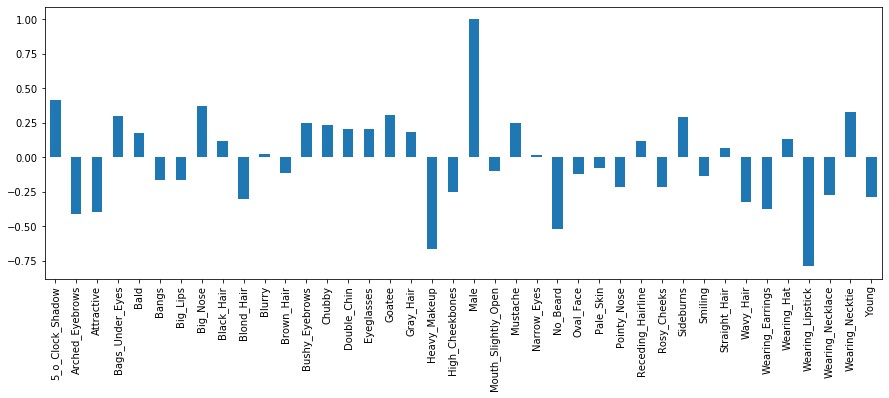

In [16]:
attr_correlations['Male'].plot.bar(figsize=(15,5))

## What facial attributes correlate with Age?

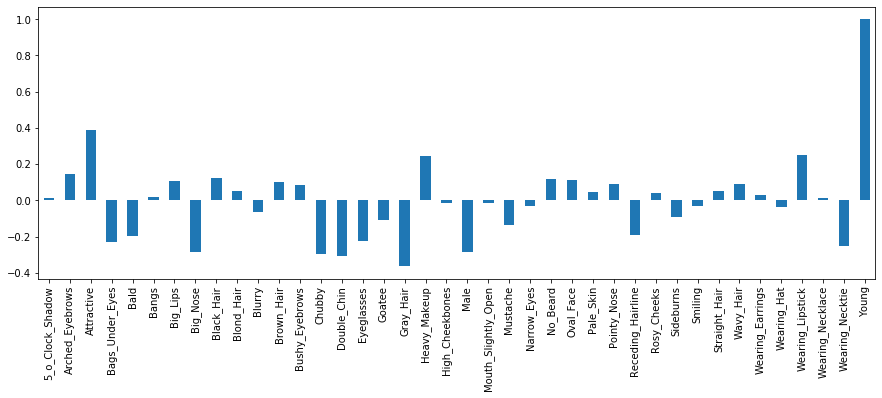

In [17]:
attr_correlations['Young'].plot.bar(figsize=(15,5))

# Train Test Split

In [18]:
df_partition = pd.read_csv(data_path / 'list_eval_partition.csv', index_col='image_id')
df_partition['partition'].value_counts()

0    162770
2     19962
1     19867
Name: partition, dtype: int64

In [19]:
target = 'Male'
final_df = df_partition.join(df_attr[target], how='inner')
final_df.head()

,partition,Male
image_id,,
000001.jpg,0,0
000002.jpg,0,0
000003.jpg,0,1
000004.jpg,0,0
000005.jpg,0,0


In [20]:
train_df = final_df[final_df['partition'] == 0]
val_df = final_df[final_df['partition'] == 1]
test_df = final_df[final_df['partition'] == 2]

In [21]:
train_df.shape[0]

162770

In [22]:
train_df.iloc[2].name

'000003.jpg'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef8ab9cc90>]],
      dtype=object)

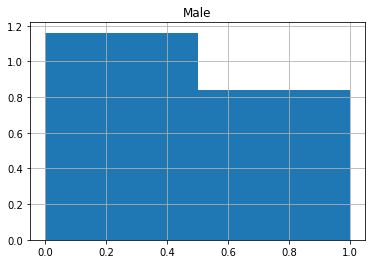

In [23]:
train_df.hist(column=target, bins=2, density=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef89ebc850>]],
      dtype=object)

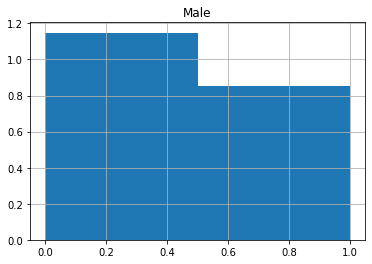

In [24]:
val_df.hist(column=target, bins=2, density=True)

**Target Distribution**: The target distribution across train-validation splits are the same. We will not balance this out, assuming this as the true data distribution.


# Toy Dataset for Experiments

# CelebA Dataset API Test

In [25]:
import sys
sys.path.append('..')

%load_ext autoreload
%autoreload 2

In [26]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from disenn.datasets.celeba_dataset import CelebA

In [27]:
dataset = CelebA(split='train', data_path='data/celeba')

In [28]:
img, label = dataset[10]

In [29]:
img.max(), img.min()

(tensor(0.9686), tensor(0.0471))

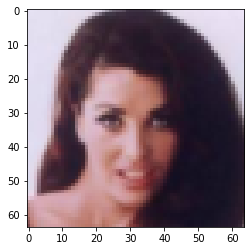

In [30]:
plt.imshow(img.numpy().transpose(1,2,0))

In [31]:
dl = DataLoader(dataset, batch_size=10, shuffle=False)

In [32]:
x,y = next(iter(dl))

In [33]:
x.shape

torch.Size([10, 3, 64, 64])

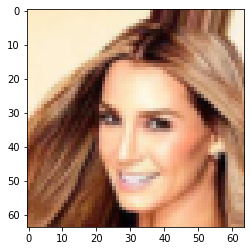

In [34]:
plt.imshow(x[0].numpy().transpose(1,2,0))